In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from time import time
import cv2
%matplotlib inline

## Constants

In [45]:
boundaries_of = {
    'red': (
        np.array([50, 56, 179], dtype='uint8'), 
        np.array([101, 101, 255], dtype='uint8'),  
    ),
    'blue': (
        np.array([156, 0, 0], dtype='uint8'),
        np.array([255, 101, 101], dtype='uint8'),
    
    )
}

direction_when_see = {
    'red': 'left',
    'blue': 'right',
}

## Image processing utils

In [33]:
def is_color_in_range(color, lower, upper):
    return np.all(lower < cluster_center) and np.all(upper > cluster_center)
    

def crop_image(image, w_crop_size, h_crop_size=None):
    if h_crop_size is None:
        h_crop_size = w_crop_size
        
    w, h, d = tuple(image.shape)
    w_lower_bound = int(w * w_crop_size)
    w_upper_bound = int(w * (1 - w_crop_size))
    h_lower_bound = int(h * h_crop_size)
    h_upp,
    'blue': 'righer_bound = int(h * (1 - h_crop_size))
    
    return image[
        w_lower_bound: w_upper_bound, 
        h_lower_bound: h_upper_bound,
        :
    ]

def train_k_means(image_array, n_colors):
    image_array_sample = shuffle(image_array, random_state=0)[:500]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    return kmeans

def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

## Clusterize the image

[[ 174.29595016   88.0623053     9.76012461]
 [ 243.72625698  247.53072626  251.81564246]]


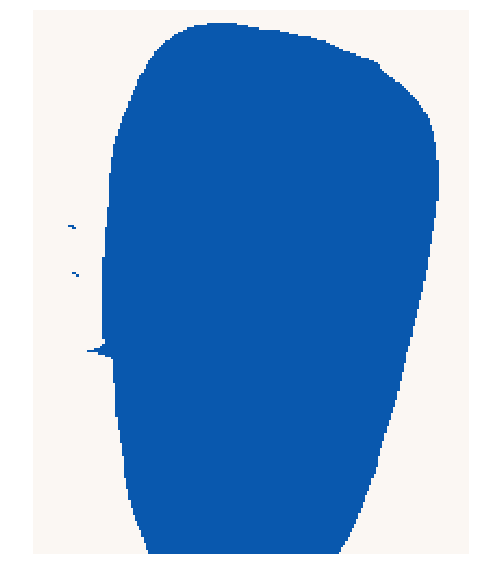

CPU times: user 187 ms, sys: 5.76 ms, total: 193 ms
Wall time: 193 ms


In [43]:
%%time
image = cv2.imread('test_blue.jpeg')

# Uncomment if you need crop
# cropped_image = crop_image(image, 0.2)
cropped_image = image

w, h, d = tuple(cropped_image.shape)
image_array = np.reshape(cropped_image, (w * h, d))

kmeans = train_k_means(image_array, 2)
labels = kmeans.predict(image_array)
recreated_image = recreate_image(
    kmeans.cluster_centers_, 
    labels, 
    w, 
    h
)
print kmeans.cluster_centers_


plt.figure(1, figsize=(10, 10))
plt.imshow(cv2.cvtColor(np.uint8(recreated_image), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Find out the direction to go

In [46]:
direction_to_go = None
needed_colors = boundaries_of.keys()
for cluster_center in kmeans.cluster_centers_:
    for needed_color in needed_colors:
        if is_color_in_range(
            cluster_center, 
            boundaries_of[needed_color][0],
            boundaries_of[needed_color][1],
        ):
            direction_to_go = direction_when_see[needed_color]
            
print direction_to_go

right
